In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/diabetes.csv")

# Análise dos dados

### Inicialmente, podemos identificar que:
- A escala dos dados é bem dispersa, pela media podemos perceber por exemplo Pregnancies = 3.8 e Glucose = 120.8 e obviamente, precisarmeos fazer um escalonamento

In [3]:
# df.describe()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Distribuição dos dados

Text(0.5, 1.0, 'Distribuição de Pacientes com e sem Diabetes')

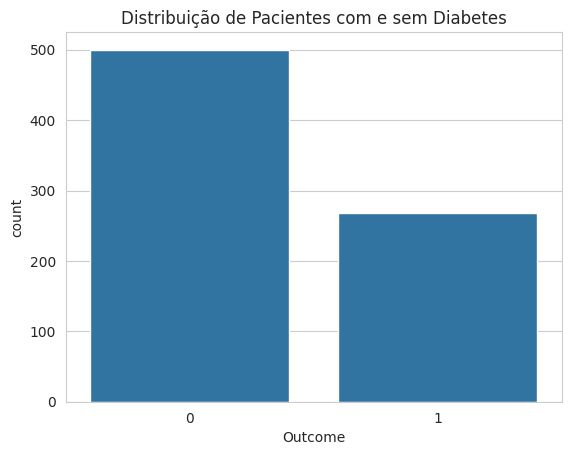

In [6]:
sns.countplot(data=df, x='Outcome')
plt.title('Distribuição de Pacientes com e sem Diabetes')

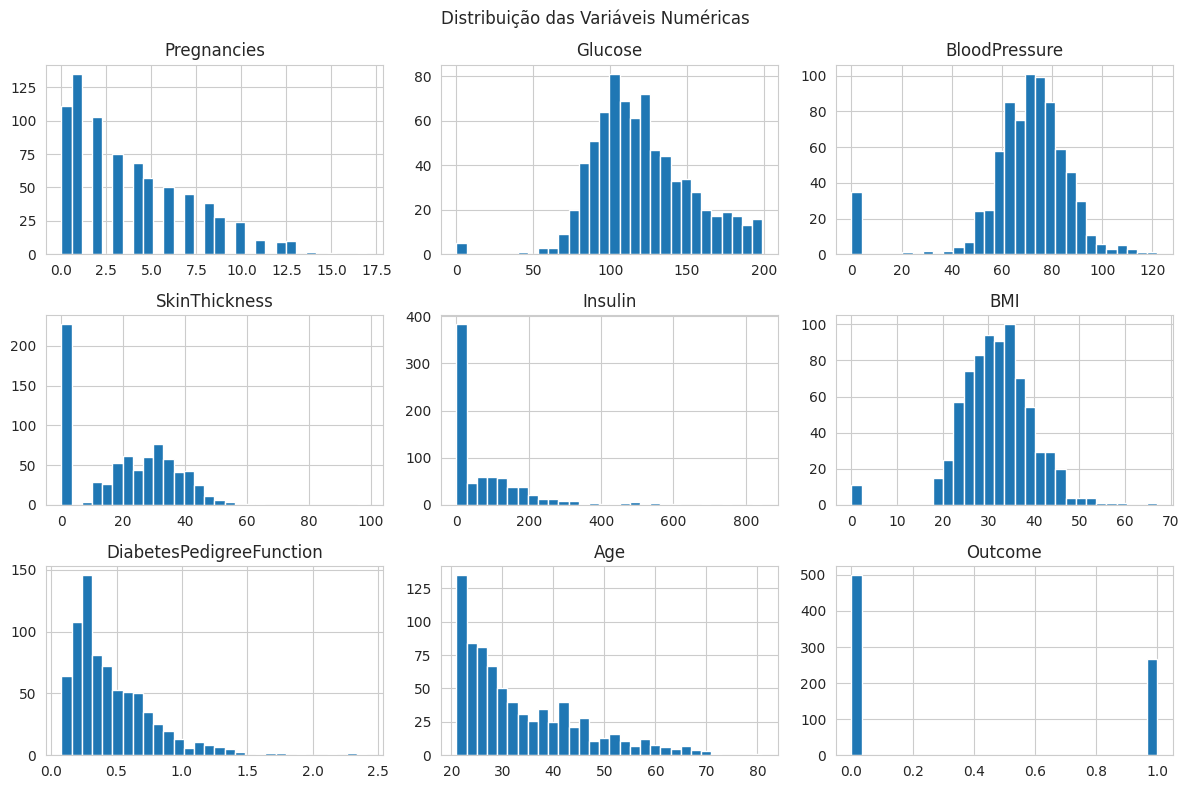

In [7]:
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.tight_layout()

## Avaliação visual

Podemos perceber que temos muitos valores com ZERO, sendo que não faz sentido ser, exemplo: BloodPressure, SkinThickness, Insulin, Bmi (inclusive impacta na curva gaussiana)

Então vamos substituir os zeros por MÉDIAS, exceto para as colunas que podem conter ZEROS (Pregnancies, PedigreeFunction, Outcome)


In [2]:
from data_prepare import zero_to_mean

zero_to_mean(df)

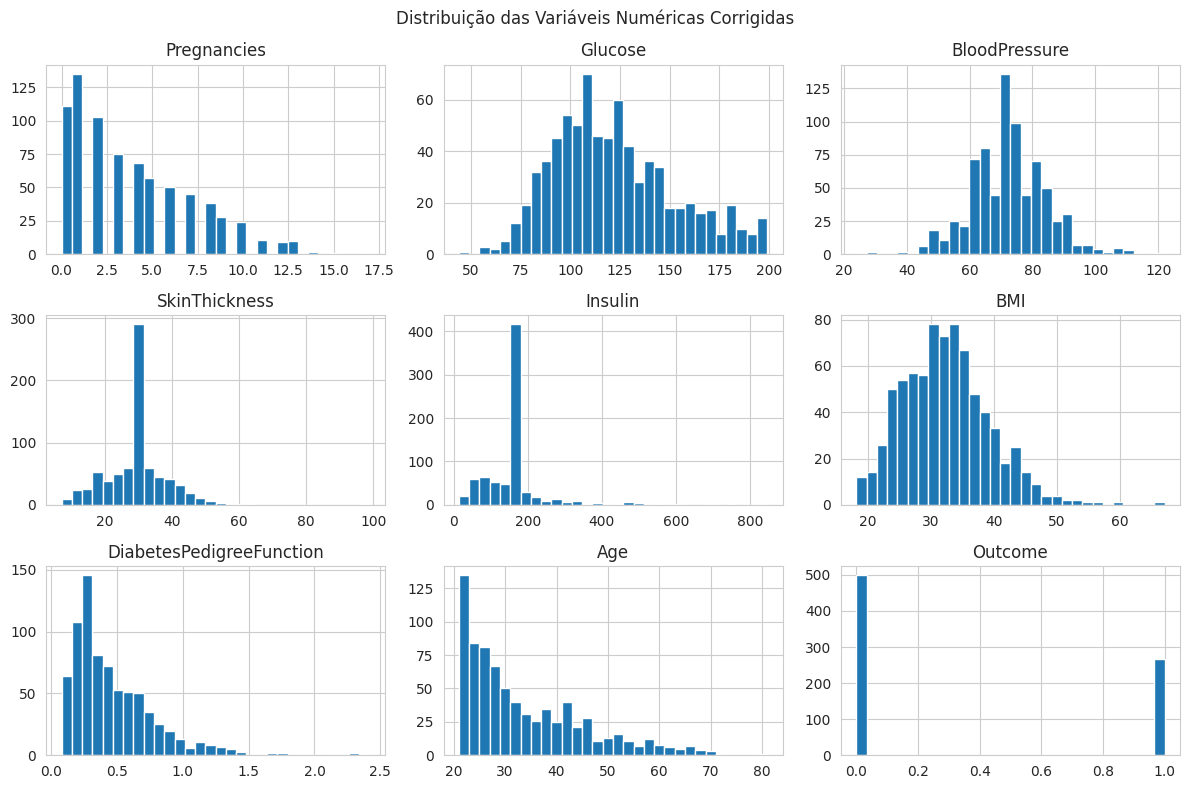

In [6]:
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuição das Variáveis Numéricas Corrigidas")
plt.tight_layout()

Visualmente, podemos identificar algumas questões nas correlações
- Pregnancies está mais relacionado com idade, será que essa é uma variável importante mesmo?
- Além disso, essa base é voltada para mulheres. Se tentar prever de homens, esse dado poderia atrapalhar mais ainda.
- Glucose é a variável com maior correlação em relação a Outcome

Text(0.5, 1.0, 'Mapa de Correlação')

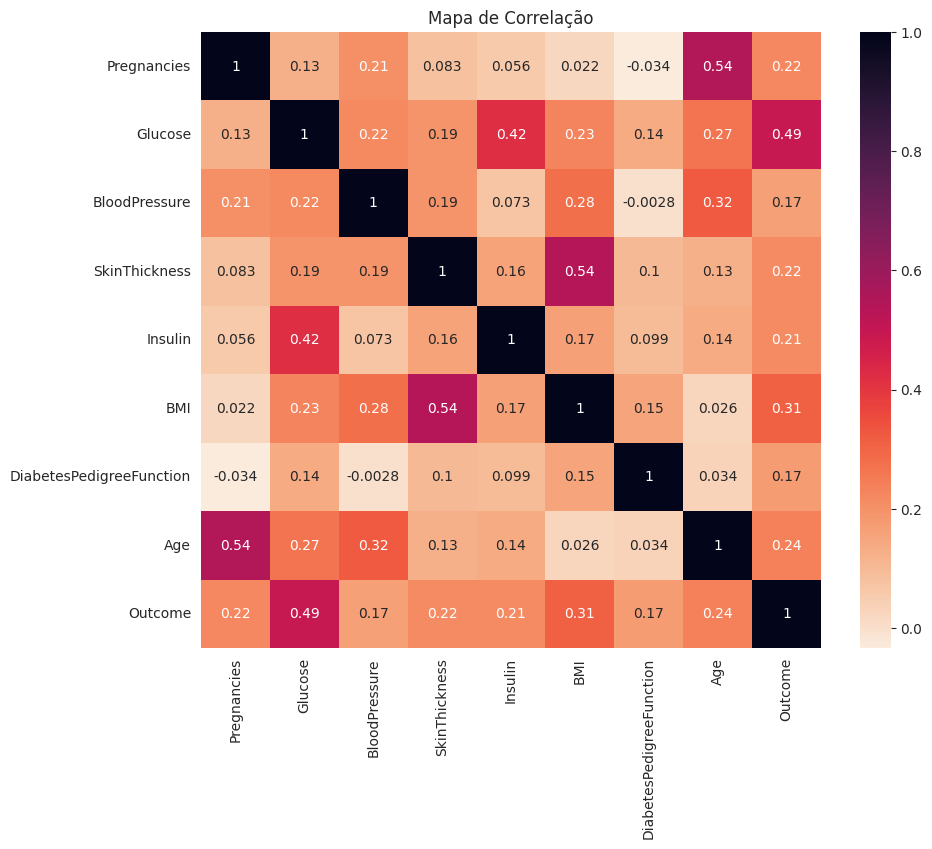

In [3]:
plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='flare')
sns.heatmap(df.corr(), annot=True, cmap='rocket_r')
plt.title('Mapa de Correlação')

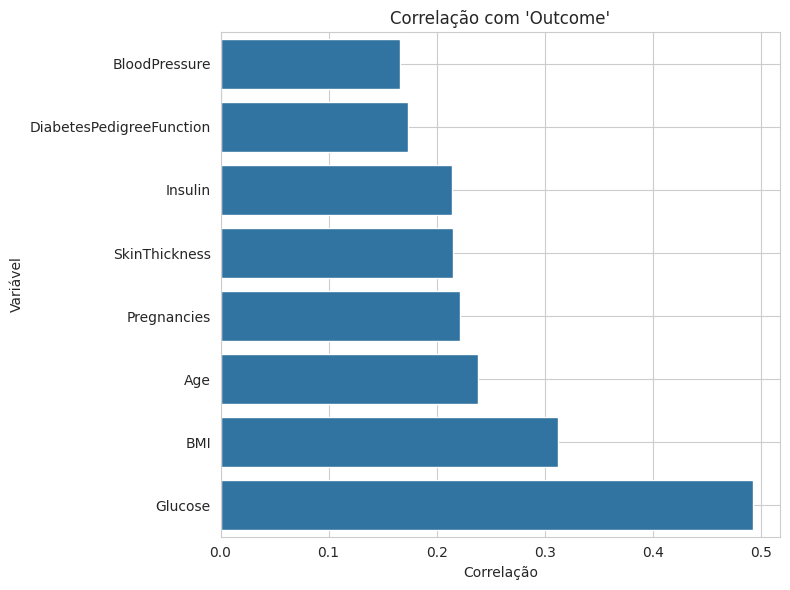

In [8]:
# Calcula correlação com a variável target
corr_with_outcome = df.corr()["Outcome"].drop("Outcome").sort_values()

# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_outcome.values, y=corr_with_outcome.index)
plt.title("Correlação com 'Outcome'")
plt.xlabel("Correlação")
plt.ylabel("Variável")
plt.grid(True)
plt.tight_layout()
plt.show()

# A Glucose

Como a glucose é a variável com maior correlação, vamos avaliá-la com todas as outras em comparação a Outcome

Podemos perceber que Glucose acima de 140 é sempre um cenário favorável para Outcome = 1 e entre 120 e 140 é um cenário de risco para outcome, independente da variável comparada

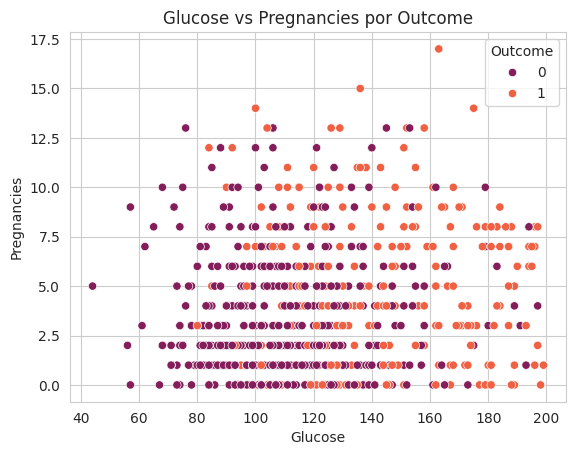

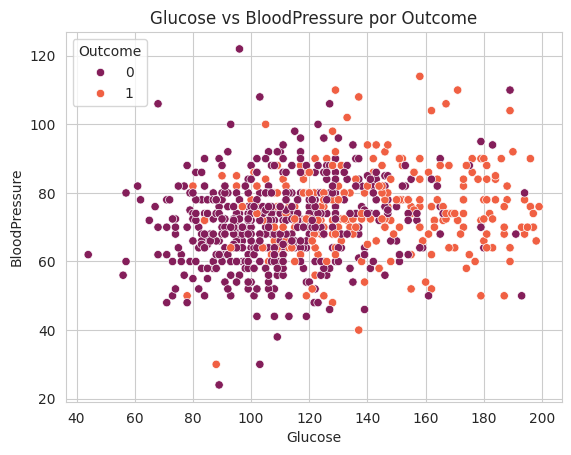

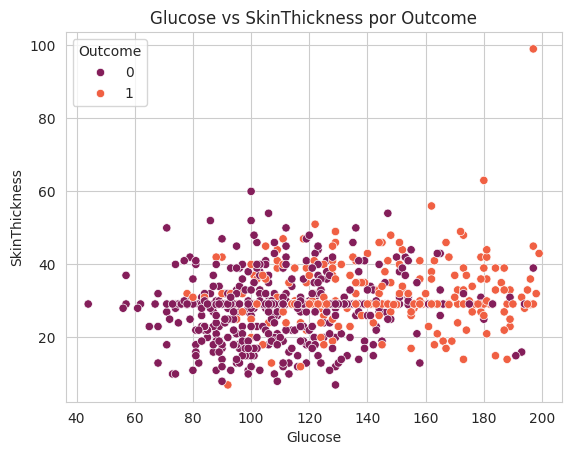

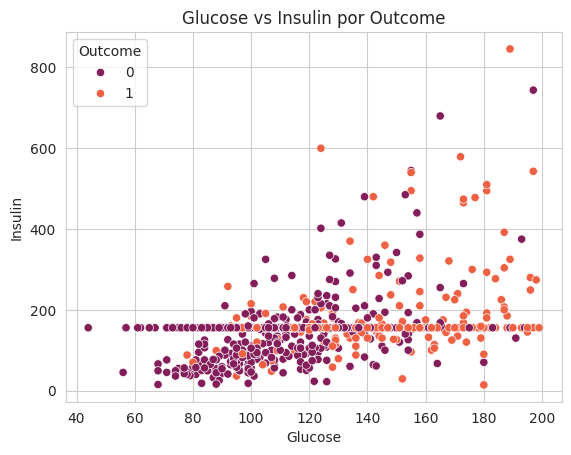

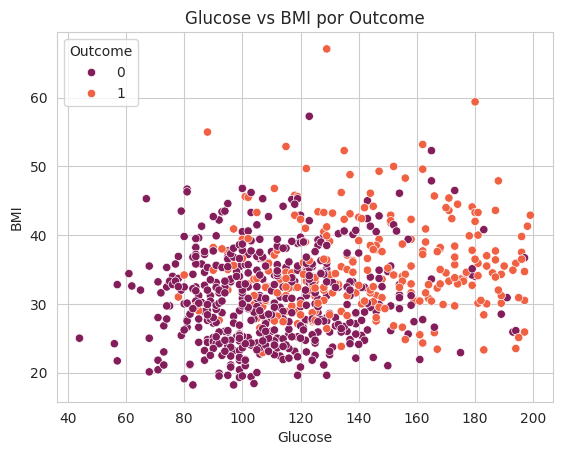

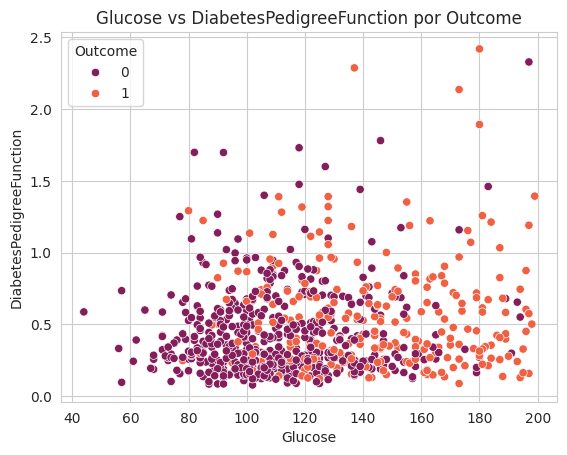

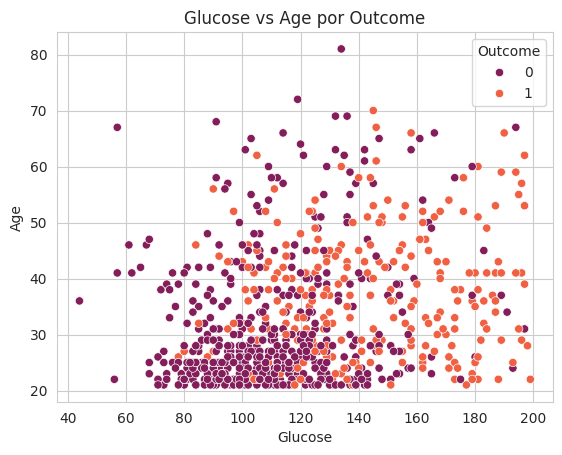

In [9]:
# sns.pairplot(data = df, hue = 'Outcome')
for col in df.columns:
    if col != "Glucose" and col != 'Outcome':  # evitar duplicar eixo x/y
        sns.scatterplot(data=df, x="Glucose", y=col, hue="Outcome", palette="rocket")
        plt.title(f"Glucose vs {col} por Outcome")
        plt.show()